First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  wo

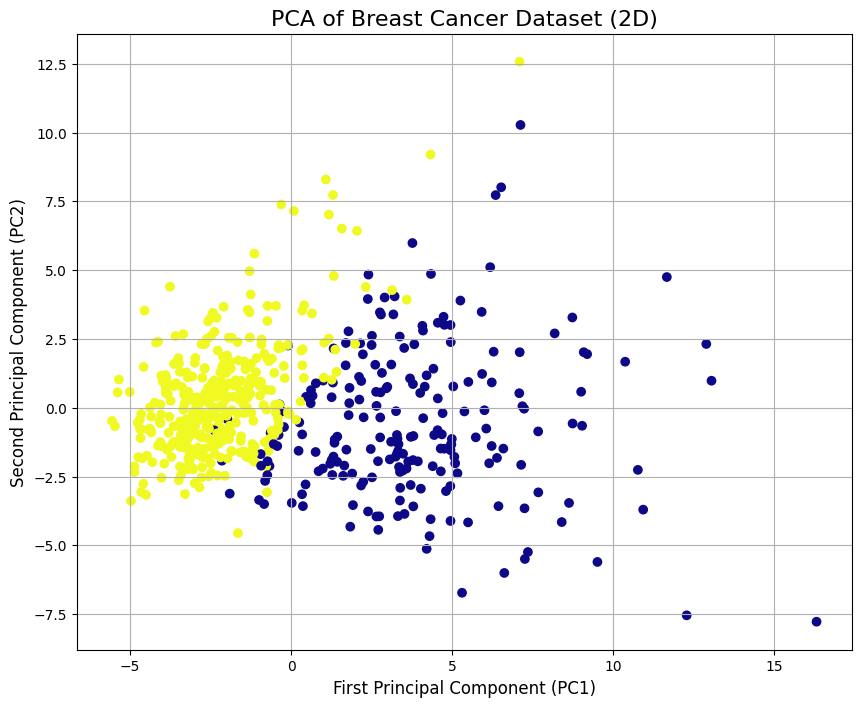

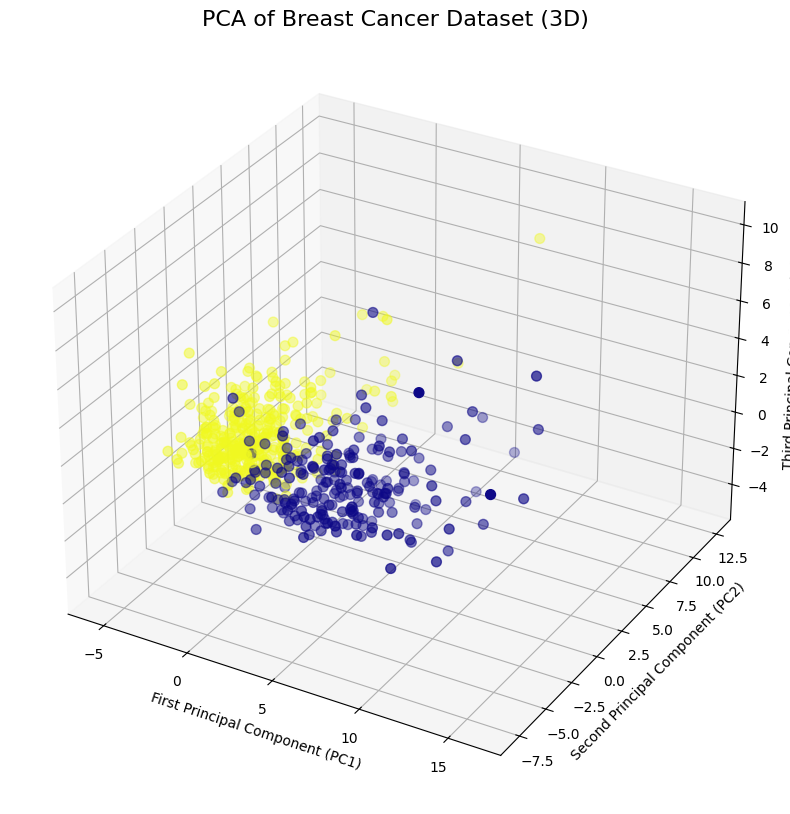


Explained variance by each principal component:
PC1: 0.4427 (44.27%)
PC2: 0.1897 (18.97%)
PC3: 0.0939 (9.39%)
Total Explained Variance (PC1+PC2+PC3): 0.7264 (72.64%)


In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

# Step 2: Load the Dataset
cancer_data = load_breast_cancer()

# Explore the dataset's structure
# print(cancer_data.keys())

# Step 3: Create a Pandas DataFrame
# The data contains the features, and feature_names are the column headers.
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
print("First 5 rows of the dataset:")
print(df.head())
print(f"\nOriginal dataset shape: {df.shape}")

# Step 4: Standardize the Data
# PCA is sensitive to the scale of the features, so standardization is a crucial step.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Apply PCA
# The manual's code uses n_components=3, which allows for both 2D and 3D visualization.
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
print(f"\nShape of data after PCA: {pca_df.shape}")

# Step 6: Visualize the Principal Components

# --- 2D Visualization ---
plt.figure(figsize=(10, 8))
plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=cancer_data['target'], # Color by the target class (malignant/benign)
    cmap='plasma'
)
plt.title('PCA of Breast Cancer Dataset (2D)', fontsize=16)
plt.xlabel('First Principal Component (PC1)', fontsize=12)
plt.ylabel('Second Principal Component (PC2)', fontsize=12)
plt.grid(True)
plt.show()

# --- 3D Visualization ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=cancer_data['target'],
    cmap='plasma',
    s=50 # marker size
)
ax.set_title('PCA of Breast Cancer Dataset (3D)', fontsize=16)
ax.set_xlabel('First Principal Component (PC1)')
ax.set_ylabel('Second Principal Component (PC2)')
ax.set_zlabel('Third Principal Component (PC3)')
plt.show()

# Step 7: Explained Variance
# This tells us how much of the original data's variance is captured by each principal component.
explained_variance = pca.explained_variance_ratio_
print("\nExplained variance by each principal component:")
print(f"PC1: {explained_variance[0]:.4f} ({explained_variance[0]*100:.2f}%)")
print(f"PC2: {explained_variance[1]:.4f} ({explained_variance[1]*100:.2f}%)")
print(f"PC3: {explained_variance[2]:.4f} ({explained_variance[2]*100:.2f}%)")
print(f"Total Explained Variance (PC1+PC2+PC3): {sum(explained_variance):.4f} ({sum(explained_variance)*100:.2f}%)")